In [ ]:
!git clone https://github.com/Seife1/Pharmaceuticals-Sales-Forecasting.git

Cloning into 'Pharmaceuticals-Sales-Forecasting'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 64 (delta 26), reused 33 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 2.32 MiB | 5.05 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
!git config --global user.email "seifegebreal.mosisa@aait.edu.et"
!git config --global user.name "Seife1"

In [ ]:
%cd /content/Pharmaceuticals-Sales-Forecasting/notebooks/

/content/Pharmaceuticals-Sales-Forecasting/notebooks


In [ ]:
!pwd

/content/Pharmaceuticals-Sales-Forecasting/notebooks


In [ ]:
import pandas as pd
import os, sys
# Add the 'src' directory to the system path.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))  # Use os.path.join and os.getcwd() for robust path construction

# Import the functions from the 'feature_engineering.py' module (assuming it's a file named 'feature_engineering.py')
from feature_engineering import extract_date_features, scale_data
from train_model import train_random_forest
from utils import evaluate_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data
# sys.path.append(os.path.abspath('../data'))

train_df = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Week4/data/cleaned_train_data.csv', parse_dates=['Date'])
test_df = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Week4/data/merged_test_data.csv', parse_dates=['Date'])

<ipython-input-23-8f829aa5cf54>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Week4/data/cleaned_train_data.csv', parse_dates=['Date'])
<ipython-input-23-8f829aa5cf54>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Week4/data/merged_test_data.csv', parse_dates=['Date'])


In [ ]:
# Feature Extraction
test_df = extract_date_features(test_df)

In [ ]:
# Split Data
train_set = train_df[train_df['Year'] <= 2014]
val_set = train_df[train_df['Year'] == 2015]

input_columns = ['Store', 'DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
target_column = 'Sales'

# One Hot Encoding
train_inputs = pd.get_dummies(train_set[input_columns])
val_inputs = pd.get_dummies(val_set[input_columns])
test_inputs = pd.get_dummies(test_df[input_columns])

train_targets = train_set[target_column]
val_targets = val_set[target_column]
# test_targets = test_df[target_column]

numeric_columns = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']


In [ ]:
# Preprocess Data
train_inputs, val_inputs, test_inputs = scale_data(train_inputs, val_inputs, test_df, numeric_columns)

In [ ]:
# Train RandomForest Model
random_forest_model = train_random_forest(train_inputs, train_targets, val_inputs, val_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 405.5836, Val RMSE: 1073.2577
Train RMSPE: 0.1045, Val RMSPE: 0.18444
Model saved as ../models/random_forest_model-28-09-2024-05-31-55-719303.pkl


### **Error Metrics:**
**Train RMSE:** `405.5836` and **Validation RMSE**: `1073.2577`:
* The train RMSE is significantly lower than the validation RMSE, indicating that the model performs well on the training data but struggles to generalize to unseen data. This difference could suggest some level of overfitting, where the model captures patterns in the training set that do not generalize well to new data.

**Train RMSPE**: `0.1045` and **Validation RMSPE**: `0.18444`:
* The Root Mean Square Percentage Error (RMSPE) values also show a noticeable increase from train to validation data, supporting the overfitting concern. The train RMSPE of 10.45% suggests the model is relatively accurate on training data, but the higher validation RMSPE of 18.44% indicates the predictions for unseen data have larger errors, especially in percentage terms.

Finally, the large difference between train and validation RMSE implies overfitting. Techniques like tuning hyperparameters, adding regularization, or including more robust cross-validation could help.

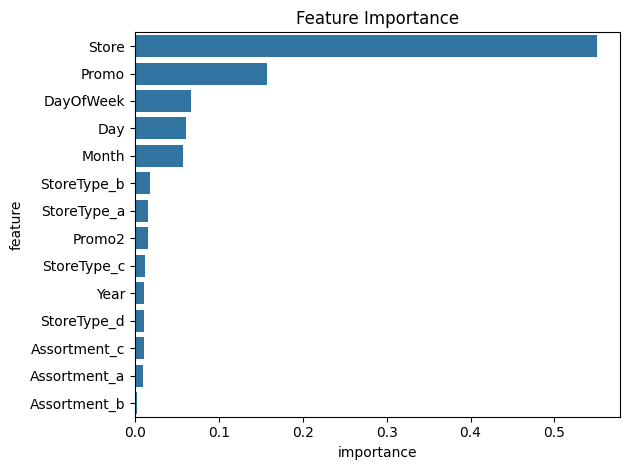

In [ ]:
# Feature Importance
feature_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot Feature Importance
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('../models/feature_importance.png')
plt.show()

### Feature Importance Insights:
* **Store**: The most important feature by far, indicating that store-specific characteristics strongly influence sales.

* **Promo**: Promotions are also a significant factor, showing that sales are notably affected by promotional events.

* **DayOfWeek, Day, and Month**: These temporal features are less important but still have a moderate impact, highlighting some weekly and monthly variations in sales.

* **StoreType and Assortment**: Features like store type and assortment have much lower importance, suggesting that these variables contribute less to predicting sales compared to store ID and promotions.

Finally the high importance of store and promo highlights the need to focus on store-level data and promotional activities to improve predictions.